# Multiple Class Classification RandomForest Approach with Brand Perception Scale ($ y_{\text{BP}} $, $ y_{\text{BL}} $, $ y_{\text{BT}} $) Research Project (with the help of TUBITAK 2209A, 23/1);

**Classification of Brand Perception Using Random Forest: Brand Preference ($ y_{\text{BP}} $), Brand Loyalty ($ y_{\text{BL}} $), and Brand Trust ($ y_{\text{BT}} $)**

This project applies Random Forest classification to predict levels of Brand Preference (BP), Brand Loyalty (BL), and Brand Trust (BT) among undergraduate students using a dataset with categorical dependent variables. The goal is to classify these perceptions as Low, Medium, or High based on students' attitudes toward brands, measured through 22 independent variables.**$ y_{\text{BP}} $**: Low Preference Level, Medium Preference Level, High Preference Level, **$ y_{\text{BL}} $**: Low Loyalty Level, Medium Loyalty Level, High Loyalty Level, **$ y_{\text{BT}} $**: Low Trust Level, Medium Trust Level, High Trust Level. This project offers insights from undergraduate students in Ankara, Turkey, providing value to researchers exploring brand perception among young consumers. It’s designed as a portfolio project for a data science novice, showcasing techniques for handling multi-class classification with Random Forest in the presence of class imbalance.

**Library Installation**: The project begins with installing necessary Python libraries such as `pandas`, `numpy`, `seaborn`, `sklearn`, and `imblearn`.
**Data Preparation**: 
   - Import the dataset and separate dependent and independent variables.
   - Visualize the initial class imbalance in the dependent variables.
**Class Imbalance Handling**:
   - Split data into training ($75\%$) and test sets ($25\%$).
   - Apply SMOTE (Synthetic Minority Over-sampling Technique) to the training data to balance the class distribution.
**Model Building**:
   - Develop classification models for BP, BL, and BT using Random Forest.
   - Train the models on resampled training data and evaluate using confusion matrices and key metrics (accuracy, precision, recall, F1 score).
**Feature Importance and Visualizations**:
   - Visualize the Variable Importance Plot and identify the top 6 variables for each model.
   - Display decision trees for individual models to explore decision pathways.
**Model Evaluation**:
   - Apply the OneVsRest approach and draw ROC curves for each model, examining the area under the curve to evaluate performance.

Data analysis was conducted in Python 3.12.5 (Windows 64-bit) within the Jupyter Notebook environment, on a system featuring an 11th Gen Intel Core i5-11260H processor, 24 GB RAM, and an NVIDIA GeForce RTX 2050ti GPU, manufactured by Micro-Star International Co. Key libraries included `pandas` for data handling, `numpy` for numerical computations, `seaborn` for visualizations, and various modules from `sklearn` and `imblearn` for model training, class balancing, and evaluation. This project developed three classification models for BP, BL, and BT using Random Forest. Each model incorporated 22 independent variables to predict the level of brand perception. The RF algorithm, introduced by Breiman (1984; 1996; 2001), constructs decision trees using bootstrap samples. This model employs **ensemble learning** to improve accuracy and reduce sensitivity to overfitting. To mitigate class imbalance, SMOTE (Chawla et al., 2002) was used, creating synthetic samples in the minority class space to enhance model accuracy without introducing external information. $ D_n^{(j)} = \{ (x_1, y_1^{(j)}), (x_2, y_2^{(j)}), \dots, (x_n, y_n^{(j)}) \} \quad \text{and} \quad y_i^{(j)} = h(x_i; \theta_j, D_n^{(j)}) $ In Random Forest classification, \( M \) decision trees are constructed. Each tree makes predictions through a voting mechanism, where the final prediction for \( x_i \) is determined by majority vote: $ \hat{y}(x_i) = \arg\max_{c \in C} \left\{ \sum_{j=1}^{M} \mathbb{1}\left[h(x_i; \theta_j, D_n^{(j)}) = c\right] \right\} $ Here, $ C $ denotes the set of all possible classes. This ensemble technique provides a robust classification by combining multiple decision trees, thereby enhancing model performance (Kursa, 2014). The following metrics were used for model evaluation:

- **Accuracy**: Measures the proportion of correct predictions.
- **Precision and Recall**: Key indicators for minority class prediction.
- **F1 Score**: A balanced metric for performance assessment.
- **Confusion Matrix**: Provides insight into true positives, false positives, true negatives, and false negatives.

In the original dataset, the accuracy values for BP, BL, and BT were $0.76$, $0.75$, and $0.79$, respectively. With SMOTE-applied balanced datasets, these values increased by $0.09$, $0.07$, and $0.01$, respectively. The project continues to focus on addressing challenges posed by class imbalance in multi-class classification, specifically through ensemble methods. Future enhancements will include exploring alternative resampling techniques, such as undersampling and ADASYN, as well as ensemble methods with varied weighting. Additionally, probabilistic approaches like Bayesian inference and Maximum Likelihood Estimation (MLE) may further enrich the analysis.


In [2]:

%load_ext autoreload
%autoreload 2
%matplotlib inline
import time


### Getting the libraries;
Additionally, we utilized widely used libraries such as pandas for data analysis, numpy for numerical calculations, and seaborn and matplotlib for data visualization in our study. During the modeling process, we employed RandomForestClassifier from scikit-learn and the SMOTE method from the imblearn library to address imbalanced datasets. We also applied performance metrics such as classification_report and confusion_matrix to evaluate the model's effectiveness. These libraries provided significant support in the development of our project, aiming to achieve more accurate results.

In [3]:

# Getting the libraries;
start_time = time.time()
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from pandas.api.types import CategoricalDtype
from sklearn.tree import plot_tree
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")


Elapsed Time: 1.00 seconds


### Fitting the dataset;
This code block loads a dataset, renames specific columns for clarity, and calculates the time taken to execute these steps. First, it uses `pd.read_csv()` to import data from `"VEBIST_data_adj.csv"` with a semicolon (`;`) as the delimiter, enabling compatibility with the CSV’s formatting. To ensure clarity, key columns are renamed: `mt_adj` to **BP** (Brand Preference), `ms_adj` to **BL** (Brand Loyalty), and `mg_adj` to **BT** (Brand Trust), aligning the dataset with project objectives and improving interpretability for subsequent analysis steps. The script also measures the execution time by recording timestamps before and after loading and renaming the data, providing feedback on the efficiency of these operations, which is useful for larger datasets. Finally, the modified dataset is displayed to verify successful loading and renaming.

In [4]:

# Fitting the dataset;
start_time = time.time()
data = pd.read_csv("VEBIST_data_adj.csv", delimiter=';', engine='python')
data = data.rename(columns={'mt_adj': 'BP', 'ms_adj': 'BL', 'mg_adj': 'BT'})
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
data


Elapsed Time: 0.01 seconds


BP    BL    BT  Age  Gender  Department  Year  BandR  Place  Income  \
0     Mid   Mid  High    4       0           0     4      0      1       4   
1     Low   Low   Low    3       0           0     3      1      4       2   
2     Mid  High  High    3       1           0     3      0      3       2   
3     Low  High  High    4       0           0     4      0      2       6   
4     Low   Low   Low    2       1           1     3      0      4       6   
..    ...   ...   ...  ...     ...         ...   ...    ...    ...     ...   
402  High  High  High    2       1           1     2      0      1       6   
403  High  High  High    1       1           1     1      0      1       6   
404  High  High  High    3       1           1     4      0      1       6   
405   Low  High  High    4       0           1     4      0      1       6   
406  High  High  High    3       1           1     4      0      3       6   

     ...  Timeofuse  ProductionDate  Seasonality  Material  Discount  Fashion  \
0    ...          6               4            2         6         5        1   
1    ...          2               3            3         3         2        2   
2    ...          5               4            5         4         5        5   
3    ...          5               5            2         5         3        2   
4    ...          2               2            2         2         2        2   
..   ...        ...             ...          ...       ...       ...      ...   
402  ...          5               4            4         5         4        5   
403  ...          4               3            4         4         5        4   
404  ...          4               1            4         5         4        5   
405  ...          5               3            5         5         5        3   
406  ...          4               3            4         2         5        4   

     Design  Psychologicalimpulses  Country  Recognizability  
0         6                      1        1                6  
1         2                      5        3                3  
2         5                      5        3                5  
3         4                      1        1                5  
4         2                      2        2                2  
..      ...                    ...      ...              ...  
402       5                      3        4                5  
403       5                      3        4                5  
404       5                      3        4                5  
405       4                      3        4                4  
406       4                      3        3                5  

[407 rows x 25 columns]

### Preparing and Visualization Classes ($ y_{\text{BP}} $, $ y_{\text{BL}} $, $ y_{\text{BT}} $);

This code visualizes the distribution of three key brand perception variables—BP, BL, and BT—across their categorical levels ${(Low, Mid, High)}$. It uses a combined plot to display the frequency of each class, facilitating a comparative view of these variables. To start, the dataset is restructured into a long format, allowing for easier plotting of multiple variables on a shared axis. The visualization is optimized for readability and interpretation, using distinct color coding for each variable and labeled values on each bar. The visualization also employs a custom edge styling to clearly delineate each category, enhancing data comprehension at a glance. Additional customizations, including title settings, gridlines, and legend formatting, are tailored to provide a cohesive and professional visual output, suitable for stakeholders or clients reviewing brand metrics. Finally, the plot is saved as a high-resolution image, making it ready for inclusion in reports or presentations. Execution time is measured to provide insights on the efficiency of the visualization process.

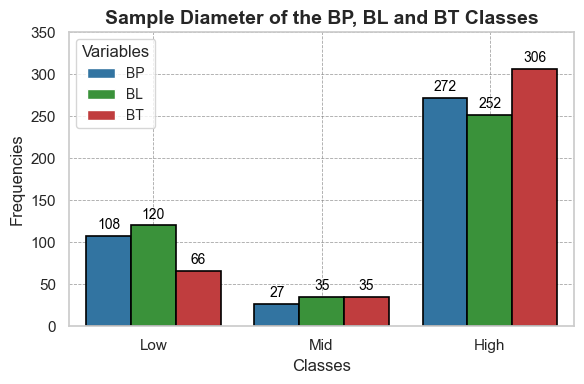

Elapsed Time: 0.33 seconds


In [5]:

start_time = time.time()
sns.set(style='whitegrid')
# Preparing the data framework for visualization;
melted_data = pd.melt(data, value_vars=['BP', 'BL', 'BT'], var_name='variable', value_name='value')

# Visualization;
fig, ax = plt.subplots(figsize=(6, 4))

colors = ['#1f77b4', '#2ca02c', '#d62728']

# Countplot - for categorical variables;
sns.countplot(data=melted_data, 
               x='value', 
               hue='variable', 
               palette=colors, 
               ax=ax,
               order=['Low', 'Mid', 'High'])

# Adding values on each bar;
for p in ax.patches:
    count = p.get_height()
    if count > 0:
        ax.annotate(f'{int(count)}',
                     (p.get_x() + p.get_width() / 2., count), 
                     ha='center', va='baseline', 
                     fontsize=10,
                     color='black', 
                     xytext=(0, 5), 
                     textcoords='offset points')

# Axis range adjustment;
ax.set_ylim(0, 350)
ax.set_title('Sample Diameter of the BP, BL and BT Classes', fontsize=14, fontweight='bold')
ax.set_xlabel('Classes', fontsize=12)
ax.set_ylabel('Frequencies', fontsize=12)
ax.legend(title='Variables', labels=['BP', 'BL', 'BT'], loc='upper left', fontsize=10, title_fontsize='12', frameon=True)
ax.grid(visible=True, color='gray', linestyle='--', linewidth=0.6, alpha=0.7)

# Stick edges;
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)


plt.tight_layout()
plt.savefig('output_original_plot.png', dpi=300)
plt.show()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")


### Data Preparation for Brand Perception Models ($ y_{\text{BP}} $, $ y_{\text{BL}} $, $ y_{\text{BT}} $);

This code prepares the dataset for classification by separating independent and dependent variables for three brand perception models. For each model, the independent variable matrix (`X_BP`, `X_BL`, `X_BT`) is derived by dropping the target columns (BP, BL, BT) from the dataset, while the target vectors (`y_BP`, `y_BL`, `y_BT`) are created by isolating each dependent variable individually. The categorical order of the classes ${(Low, Mid, High)}$ is predefined to maintain consistency across models. A `CategoricalDtype` object is created to ensure the proper order, facilitating reliable encoding and comparison. Each target column is then recoded numerically to align with this categorical order, allowing for seamless processing in machine learning algorithms. The start and end times are recorded to monitor execution efficiency, particularly useful for larger datasets where preparation time could affect overall performance. The final print statements confirm class names for each perception model, verifying the consistency and correctness of the categorical transformation.


In [6]:

# Data Preparation for Brand Perception Models (BP, BL, BT);
start_time = time.time()
X_BP = data.drop(columns=['BP', 'BL', 'BT']).values
y_BP = data['BP'].values
X_BL = data.drop(columns=['BP', 'BL', 'BT']).values
y_BL = data['BL'].values
X_BT = data.drop(columns=['BP', 'BL', 'BT']).values
y_BT = data['BT'].values

# Categorical orders;
category_order = ['Low', 'Mid', 'High']
category_type = CategoricalDtype(categories=category_order, ordered=True)

# Recoding the categories;
for column in ['BP', 'BL', 'BT']:
    data[column] = data[column].astype(category_type).cat.codes

print("BP Class Names:", category_order)
print("BL Class Names:", category_order)
print("BT Class Names:", category_order)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")


BP Class Names: ['Low', 'Mid', 'High']
BL Class Names: ['Low', 'Mid', 'High']
BT Class Names: ['Low', 'Mid', 'High']
Elapsed Time: 0.00 seconds


### Data Splitting, Resampling, and Class Distribution Verification for Brand Perception Models;

This code segment divides the dataset into training and test sets for each of the three brand perception models. A 25% split is used for testing, with the remaining 75% allocated to training, ensuring that a balanced portion is held back for model evaluation. Consistency is maintained across all splits by setting a `random_state` parameter. To address class imbalance, SMOTE (Synthetic Minority Over-sampling Technique) is applied to the training sets of BP, BL, and BT. By generating synthetic samples within the minority class data space, SMOTE ensures a more balanced class distribution, which is critical for enhancing the model’s predictive performance on underrepresented classes. The `smote.fit_resample()` function accomplishes this resampling process without introducing arbitrary delimitations, preserving the data's structure. Class categories are then reordered into a consistent sequence (Low, Mid, High) for interpretability. This standardization ensures that each target variable is aligned with its categorical hierarchy, making subsequent analysis and model interpretation straightforward. Finally, the code checks the distribution of each class in both training and test sets for BP, BL, and BT. Printing these distributions offers an immediate visual confirmation that resampling has effectively addressed imbalances in the training data while keeping the test set unaltered. Execution time is recorded to gauge the efficiency of these operations, essential for understanding processing requirements in larger datasets.

In [7]:

start_time = time.time()
# Split into training and test sets;
X_BP_train, X_BP_test, y_BP_train, y_BP_test = train_test_split(X_BP, y_BP, test_size=0.25, random_state=0)
X_BL_train, X_BL_test, y_BL_train, y_BL_test = train_test_split(X_BL, y_BL, test_size=0.25, random_state=0)
X_BT_train, X_BT_test, y_BT_train, y_BT_test = train_test_split(X_BT, y_BT, test_size=0.25, random_state=0)

# Setting the data frame for SMOTE 'without' an arbitrary delimitation;
smote = SMOTE(random_state=0)

# Fitting the resampled observations into the train set;
X_BP_resampled, y_BP_resampled = smote.fit_resample(X_BP_train, y_BP_train)
X_BL_resampled, y_BL_resampled = smote.fit_resample(X_BL_train, y_BL_train)
X_BT_resampled, y_BT_resampled = smote.fit_resample(X_BT_train, y_BT_train)

# Sınıfları belirli bir sırada kategorize et
y_BP_train = pd.Categorical(y_BP_train, categories=['Low', 'Mid', 'High'], ordered=True)
y_BP_test = pd.Categorical(y_BP_test, categories=['Low', 'Mid', 'High'], ordered=True)

y_BL_train = pd.Categorical(y_BL_train, categories=['Low', 'Mid', 'High'], ordered=True)
y_BL_test = pd.Categorical(y_BL_test, categories=['Low', 'Mid', 'High'], ordered=True)

y_BT_train = pd.Categorical(y_BT_train, categories=['Low', 'Mid', 'High'], ordered=True)
y_BT_test = pd.Categorical(y_BT_test, categories=['Low', 'Mid', 'High'], ordered=True)

print("Classes in BP train set:")
print(pd.Series(y_BP_train).value_counts().reindex(['Low', 'Mid', 'High'], fill_value=0))
print()  # Boş satır ekleniyor
print("Classes in BP test set:")
print(pd.Series(y_BP_test).value_counts().reindex(['Low', 'Mid', 'High'], fill_value=0))
print()  # Boş satır ekleniyor

print("Classes in BL train set:")
print(pd.Series(y_BL_train).value_counts().reindex(['Low', 'Mid', 'High'], fill_value=0))
print()  # Boş satır ekleniyor
print("Classes in BL test set:")
print(pd.Series(y_BL_test).value_counts().reindex(['Low', 'Mid', 'High'], fill_value=0))
print()  # Boş satır ekleniyor

print("Classes in BT train set:")
print(pd.Series(y_BT_train).value_counts().reindex(['Low', 'Mid', 'High'], fill_value=0))
print()  # Boş satır ekleniyor
print("Classes in BT test set:")
print(pd.Series(y_BT_test).value_counts().reindex(['Low', 'Mid', 'High'], fill_value=0))
print()  # Boş satır ekleniyor

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")


Classes in BP train set:
Low      82
Mid      22
High    201
Name: count, dtype: int64

Classes in BP test set:
Low     26
Mid      5
High    71
Name: count, dtype: int64

Classes in BL train set:
Low      87
Mid      29
High    189
Name: count, dtype: int64

Classes in BL test set:
Low     33
Mid      6
High    63
Name: count, dtype: int64

Classes in BT train set:
Low      50
Mid      25
High    230
Name: count, dtype: int64

Classes in BT test set:
Low     16
Mid     10
High    76
Name: count, dtype: int64

Elapsed Time: 0.02 seconds


In [8]:

# SMOTE double check for resampled observations;
print("Balanced BP classes after SMOTE:")
print(pd.Series(y_BP_resampled).value_counts().reindex(['Low', 'Mid', 'High'], fill_value=0))
print()
print("Balanced BL classes after SMOTE:")
print(pd.Series(y_BL_resampled).value_counts().reindex(['Low', 'Mid', 'High'], fill_value=0))
print()
print("Balanced BT classes after SMOTE:")
print(pd.Series(y_BT_resampled).value_counts().reindex(['Low', 'Mid', 'High'], fill_value=0))
print()


Balanced BP classes after SMOTE:
Low     201
Mid     201
High    201
Name: count, dtype: int64

Balanced BL classes after SMOTE:
Low     189
Mid     189
High    189
Name: count, dtype: int64

Balanced BT classes after SMOTE:
Low     230
Mid     230
High    230
Name: count, dtype: int64



### Training Multiple Classification Models and Fitting Random Forest Parameters;
In this stage, separate Random Forest classification models are developed utilizing SMOTE-resampled data to address class imbalance. A set of consistent hyperparameters is defined for all three models to maintain uniformity and allow for accurate cross-model comparisons. The models utilize **bootstrap sampling** with a set maximum depth of 4, limiting tree complexity and controlling overfitting. Each split is guided by the **Entropy** criterion, prioritizing information gain at each node:
$$
H(X) = - \sum_{i=1}^n P(x_i) \log P(x_i)
$$
where $ H(X) $ represents the entropy of the feature splits, guiding the model to achieve the most informative splits and enhancing predictive accuracy in the multi-class context. A high tree count with **128 estimators** ensures robust voting across classifications, with individual splits requiring at least two samples per leaf and split. The **Out-of-Bag (OOB) score** is used as an internal validation metric, represented as:
$$
\text{OOB Score} = \frac{1}{N} \sum_{i=1}^N \mathbb{1} \left( y_i = \hat{y}_{\text{oob}} \right)
$$
where $ \mathbb{1} $ is an indicator function, $ N $ represents the total observations, $ y_i $ the actual class label, and $ \hat{y}_{\text{oob}} $ the predicted class based on OOB samples. This score offers an unbiased validation metric without needing additional hold-out data. For training, **parallel processing** is activated (all CPU cores, $ n_{\text{jobs}}=-1 $, significantly reducing computation time. Execution time is recorded to assess the processing efficiency of simultaneous model training. The final elapsed time metric provides insight into computational resource requirements for fitting each Random Forest model on the SMOTE-balanced datasets, this approach effectively balances accuracy and computational efficiency, ensuring robust classification models for BP, BL, and BT.

In [9]:

start_time = time.time()
# Training Multiple Classification Models and Fitting Random Forest Parameters;
# BP Model;
classifier_BP = RandomForestClassifier(
    bootstrap=True,
    max_depth=4,
    max_leaf_nodes=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=128,
    n_jobs=-1,
    oob_score=True,
    criterion='entropy',
    random_state=0,
    verbose=0,
    warm_start=True
)
classifier_BP.fit(X_BP_resampled, y_BP_resampled)

# BL Model;
classifier_BL = RandomForestClassifier(
    bootstrap=True,
    max_depth=4,
    max_leaf_nodes=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=128,
    n_jobs=-1,
    oob_score=True,
    criterion='entropy',
    random_state=0,
    verbose=0,
    warm_start=True
)
classifier_BL.fit(X_BL_resampled, y_BL_resampled)

# BT Model;
classifier_BT = RandomForestClassifier(
    bootstrap=True,
    max_depth=4,
    max_leaf_nodes=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=128,
    n_jobs=-1,
    oob_score=True,
    criterion='entropy',
    random_state=0,
    verbose=0,
    warm_start=True
)
classifier_BT.fit(X_BT_resampled, y_BT_resampled)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")


Elapsed Time: 0.46 seconds


### Summing OOB scores;

This code calculates and visualizes the Out-of-Bag (OOB) accuracy scores for each of the three Random Forest models—BP (Brand Preference), BL (Brand Loyalty), and BT (Brand Trust). The OOB score, an internal validation metric in Random Forest, provides an unbiased estimate of model accuracy by testing each observation on the trees where it was not included during bootstrap sampling. The code first gathers OOB scores from each model and converts them into a 2D array suitable for visualization. A heatmap is generated using Seaborn to display these scores, where each score is annotated directly on the heatmap for clarity. The color gradient (`coolwarm` colormap) helps visually differentiate accuracy levels across models. The x-axis represents each model, and the y-axis shows the OOB accuracy score. The y-axis is constrained between 0 and 1 to ensure interpretability, while the plot title, axis labels, and color bar label are adjusted for readability. Finally, the code records the total elapsed time to track performance. This visualization provides an immediate comparison of OOB accuracy across the models, allowing for an efficient assessment of each model’s baseline performance without needing a separate test set.

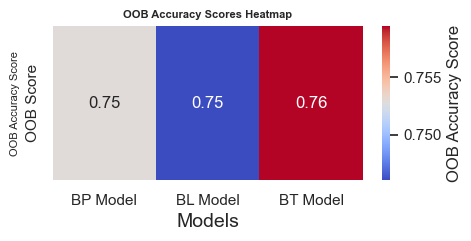

Elapsed Time: 0.14 seconds


In [10]:

start_time = time.time()
# Summing OOB scores;
oob_scores = [classifier_BP.oob_score_, classifier_BL.oob_score_, classifier_BT.oob_score_]
model_names = ['BP Model', 'BL Model', 'BT Model']

# Converting OOB scores into a 2D array;
data = np.array(oob_scores).reshape(1, -1)

# Creating a heat map;
plt.figure(figsize=(5, 2))
sns.heatmap(data, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=model_names, yticklabels=['OOB Score'],
             cbar_kws={'label': 'OOB Accuracy Score'})
plt.title('OOB Accuracy Scores Heatmap', size=8, weight='bold')
plt.xlabel('Models', size=14)
plt.ylabel('OOB Accuracy Score', size=8)
plt.ylim(0, 1)  # Y eksenini 0-1 aralığında sınırlandırma
plt.show()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")


### Evaluation of BP, BL, and BT Models: Predictions, $3\times3$ Confusion Matrices, and Performance Metrics;

In this code, we evaluate the predictive accuracy of the Random Forest models for BP, BL, and BT by comparing the models' predictions to the actual resampled training data using confusion matrices and key performance metrics. 

1. **Predictions**: For each model (BP, BL, BT), we use the `predict()` function to generate predictions (`y_BP_pred`, `y_BL_pred`, `y_BT_pred`). These predictions are then formatted as ordered categorical data (Low, Mid, High) to match the resampled target variables, allowing for a consistent evaluation across class levels.

2. **3x3 Confusion Matrices**: Each model’s performance is visualized through a 3x3 confusion matrix, providing an overview of the model's classification accuracy across three categories—Low, Mid, and High. Each cell in the matrix represents a count of predictions for each actual-versus-predicted category combination, structured as follows:

   $$
   \text{Confusion Matrix} = 
   \begin{bmatrix}
   \text{True Low, Predicted Low} & \text{True Low, Predicted Mid} & \text{True Low, Predicted High} \\
   \text{True Mid, Predicted Low} & \text{True Mid, Predicted Mid} & \text{True Mid, Predicted High} \\
   \text{True High, Predicted Low} & \text{True High, Predicted Mid} & \text{True High, Predicted High}
   \end{bmatrix}
   $$

   This matrix structure enables quick identification of both accurate and misclassified predictions across all three categories, highlighting any biases or areas for improvement.

3. **Performance Metrics**: Using the `classification_report()` function, we compute and display essential metrics for each class level—precision, recall, and F1-score:
   - **Precision**: Indicates the accuracy of predictions within a class, calculated as $$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$.
   - **Recall**: Shows the model’s ability to identify all instances within a class, calculated as $$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$.
   - **F1-Score**: Combines precision and recall to offer a balanced metric, calculated as $$ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$.

   Each metric is reported separately for Low, Mid, and High classes, enabling a detailed understanding of model performance across the categories of BP, BL, and BT. By examining these metrics, we can identify strengths and limitations in each model’s ability to distinguish nuanced differences in brand perception levels. This approach provides a comprehensive, multi-dimensional evaluation of each model, combining visual and metric-based insights to inform further refinements and validate model robustness.


In [11]:

# BP Model -Predictions;
y_BP_pred = classifier_BP.predict(X_BP_resampled)
y_BP_resampled = pd.Categorical(y_BP_resampled, categories=['Low', 'Mid', 'High'], ordered=True)
y_BP_pred = pd.Categorical(y_BP_pred, categories=['Low', 'Mid', 'High'], ordered=True)

print("Model BP - Complexity Matrix:")
print(pd.crosstab(y_BP_resampled, y_BP_pred, rownames=['Actual BP Class'], colnames=['Estimated BP Class']))
print("Model BP - Performance Metrics:")
print(classification_report(y_BP_resampled, y_BP_pred, target_names=['Low', 'Mid', 'High']))
print()

# BL Model - Predictions;
y_BL_pred = classifier_BL.predict(X_BL_resampled)  # Test set data for prediction
y_BL_resampled = pd.Categorical(y_BL_resampled, categories=['Low', 'Mid', 'High'], ordered=True)
y_BL_pred = pd.Categorical(y_BL_pred, categories=['Low', 'Mid', 'High'], ordered=True)

print("Model BL - Complexity Matrix:")
print(pd.crosstab(y_BL_resampled, y_BL_pred, rownames=['Actual BL Class'], colnames=['Estimated BL Class']))
print("Model BL - Performance Metrics:")
print(classification_report(y_BL_resampled, y_BL_pred, target_names=['Low', 'Mid', 'High']))
print()

# BT Model - Predictions;
y_BT_pred = classifier_BT.predict(X_BT_resampled)  # Test set data for prediction
y_BT_resampled = pd.Categorical(y_BT_resampled, categories=['Low', 'Mid', 'High'], ordered=True)
y_BT_pred = pd.Categorical(y_BT_pred, categories=['Low', 'Mid', 'High'], ordered=True)

print("Model BT - Complexity Matrix:")
print(pd.crosstab(y_BT_resampled, y_BT_pred, rownames=['Actual BT Class'], colnames=['Estimated BT Class']))
print("Model BT - Performance Metrics:")
print(classification_report(y_BT_resampled, y_BT_pred, target_names=['Low', 'Mid', 'High']))
print()


Model BP - Complexity Matrix:
Estimated BP Class  Low  Mid  High
Actual BP Class                   
Low                 152   19    30
Mid                   8  182    11
High                 20    3   178
Model BP - Performance Metrics:
              precision    recall  f1-score   support

         Low       0.81      0.89      0.85       201
         Mid       0.84      0.76      0.80       201
        High       0.89      0.91      0.90       201

    accuracy                           0.85       603
   macro avg       0.85      0.85      0.85       603
weighted avg       0.85      0.85      0.85       603


Model BL - Complexity Matrix:
Estimated BL Class  Low  Mid  High
Actual BL Class                   
Low                 140   24    25
Mid                   2  168    19
High                 19   14   156
Model BL - Performance Metrics:
              precision    recall  f1-score   support

         Low       0.78      0.83      0.80       189
         Mid       0.87      0.74  

This code calculates, visualizes, and saves feature importance values for three Random Forest models: BP, BL, and BT. Each model uses a set of predefined features, ranked according to their calculated importance in predicting the target variables. The `plot_single_feature_importance` function handles this process by retrieving each feature's importance score from the trained model, ranking these scores, and displaying them in a horizontal bar chart. Higher scores indicate a greater influence on model predictions, making these features key drivers for each target variable. Error bars, based on the standard deviation across trees, reflect variability, providing insights into each feature's consistency in affecting model outcomes. To create uniformity across plots, the maximum x-axis limit is defined by the highest feature importance score across all models. This allows a consistent visual comparison of feature impact in BP, BL, and BT models.  After visualizing the features, each trained model is serialized using `joblib.dump` and saved for future use. This approach ensures that models can be reloaded without retraining, an efficient method particularly suited to complex models. The process ends with a printout of the elapsed time, giving insight into the computational resources required for feature importance analysis, visualization, and model saving.

The classification results for the BP, BL, and BT models indicate strong model performance across each dimension of brand perception. Each model’s confusion matrix reflects high true positive rates, particularly in the High class, with accurate separation of Low, Mid, and High categories. For BP, an overall accuracy of 85% with balanced precision and recall (F1-score of 0.85) suggests robust predictive capacity in capturing brand preference levels. Similarly, the BL model achieves an 82% accuracy, performing particularly well in the High class, with a balanced macro and weighted average F1-score of 0.82, indicating strong generalization in brand loyalty classifications. The BT model, while slightly lower in overall accuracy at 80%, maintains consistent performance with balanced precision and recall (F1-score of 0.80), demonstrating effective brand trust classification even in nuanced Mid and High categories. These metrics collectively confirm the models' reliability and accuracy, supported by balanced F1-scores across all classes, underscoring the models' ability to predict brand perception dimensions effectively.

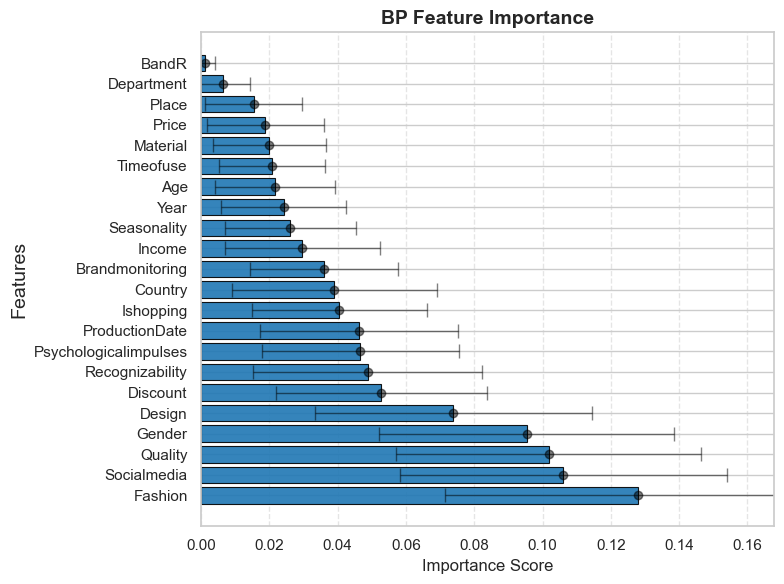

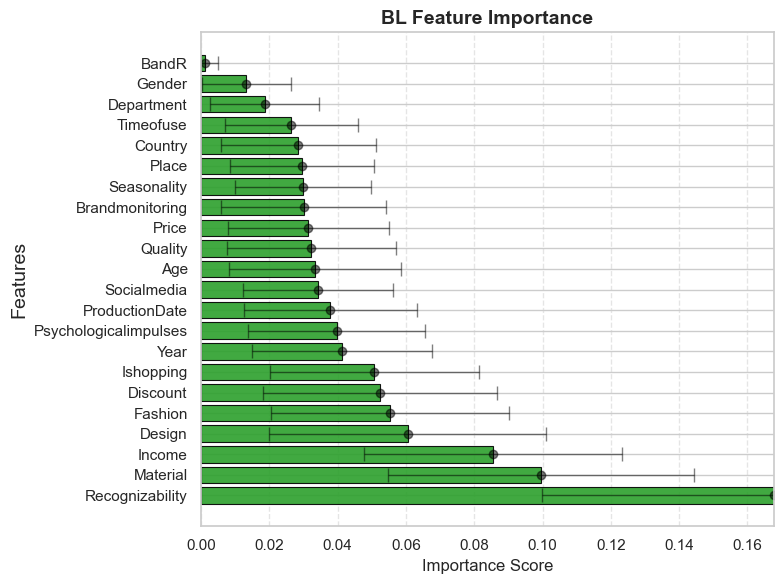

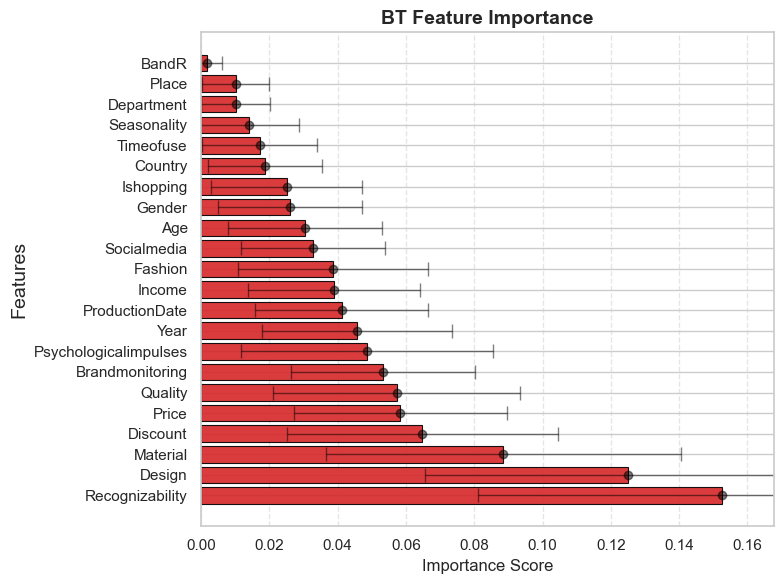

Model BP recorded: randomforest_BP_model.pkl

Model BL recorded: randomforest_BL_model.pkl

Model BT recorded: randomforest_BT_model.pkl
Elapsed Time: 1.70 seconds


In [12]:

start_time = time.time()
# Independent Variables;
feature_names = [
    "Age", "Gender", "Department", "Year", "BandR",
    "Place", "Income", "Socialmedia", "Ishopping", "Brandmonitoring", 
    "Price", "Quality", "Timeofuse", "ProductionDate", "Seasonality", 
    "Material", "Discount", "Fashion", "Design", "Psychologicalimpulses",
    "Country", "Recognizability"
]

def plot_single_feature_importance(classifier, model_name, color, xlim):
    importances = classifier.feature_importances_
    std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)

    # Rank the importance and names of features in descending order;
    indices = np.argsort(importances)[::-1]
    sorted_feature_names = np.array(feature_names)[indices]
    sorted_importances = importances[indices]
    sorted_std = std[indices]

    # Creating a new figure for each model;
    plt.figure(figsize=(8, 6))
    bars = plt.barh(sorted_feature_names, sorted_importances, color=color, alpha=0.9, edgecolor='black', linewidth=0.8)

    plt.errorbar(sorted_importances, sorted_feature_names, xerr=sorted_std * 0.5,
                 fmt='o', color='black', alpha=0.5, capsize=5, elinewidth=1)
    plt.title(f'{model_name} Feature Importance', fontsize=14, fontweight='bold')
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=14)
    plt.xlim(xlim)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(f'feature_importance_{model_name}.png', dpi=300)  # Her grafik için ayrı kaydet
    plt.show()

# Model feature importance and saving the models;
classifiers = [classifier_BP, classifier_BL, classifier_BT]
model_names = ['BP', 'BL', 'BT']
colors = ['#1f77b4', '#2ca02c', '#d62728']

# First, calculate the maximum importance score across all classifiers;
max_importance = 0
for classifier in classifiers:
    importances = classifier.feature_importances_
    max_importance = max(max_importance, np.max(importances))

# Set a common x-axis limit based on the maximum importance score;
xlim = (0, max_importance)

for classifier, model_name, color in zip(classifiers, model_names, colors):
    plot_single_feature_importance(classifier, model_name, color, xlim)

joblib.dump(classifier_BP, 'randomforest_BP_model.pkl')
print("Model BP recorded: randomforest_BP_model.pkl")
print()
joblib.dump(classifier_BL, 'randomforest_BL_model.pkl')
print("Model BL recorded: randomforest_BL_model.pkl")
print()
joblib.dump(classifier_BT, 'randomforest_BT_model.pkl')
print("Model BT recorded: randomforest_BT_model.pkl")
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")


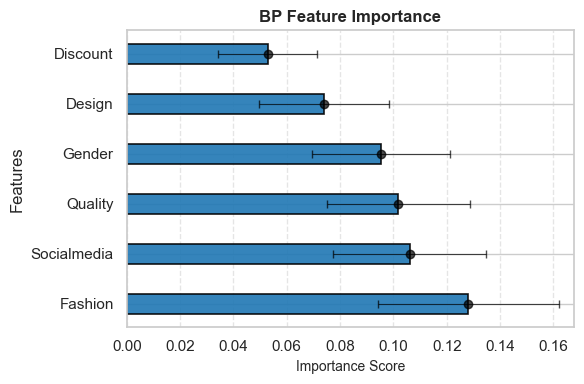

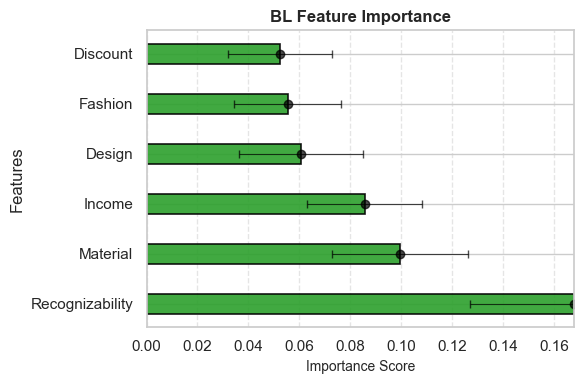

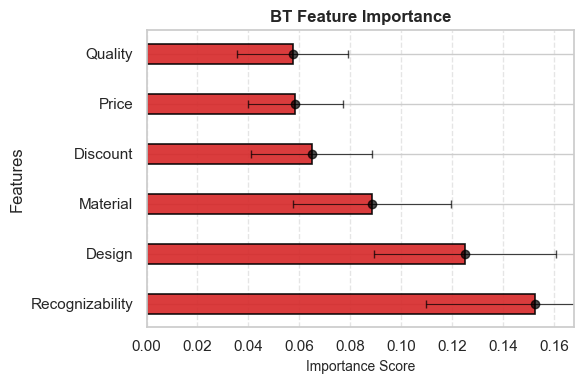

Model BP recorded: randomforest_BP_model.pkl

Model BL recorded: randomforest_BL_model.pkl

Model BT recorded: randomforest_BT_model.pkl
Elapsed Time: 0.99 seconds


In [13]:

start_time = time.time()
# Independent Variables;
feature_names = [
    "Age", "Gender", "Department", "Year", "BandR",
    "Place", "Income", "Socialmedia", "Ishopping", "Brandmonitoring", 
    "Price", "Quality", "Timeofuse", "ProductionDate", "Seasonality", 
    "Material", "Discount", "Fashion", "Design", "Psychologicalimpulses",
    "Country", "Recognizability"
]

def plot_single_feature_importance(classifier, model_name, color, xlim):
    importances = classifier.feature_importances_
    std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)

    # Selecting the most importance independent variables;
    important_indices = np.argsort(importances)[-6:][::-1]
    sorted_feature_names = np.array(feature_names)[important_indices]
    sorted_importances = importances[important_indices]
    sorted_std = std[important_indices]

    plt.figure(figsize=(6, 4))
    bars = plt.barh(sorted_feature_names, sorted_importances, color=color, alpha=0.9, edgecolor='black', 
                    linewidth=1.2, height=0.4)
    plt.errorbar(sorted_importances, sorted_feature_names, xerr=sorted_std * 0.3,
                 fmt='o', color='black', alpha=0.7, capsize=3, elinewidth=0.8)
    plt.title(f'{model_name} Feature Importance', fontsize=12, fontweight='bold')
    plt.xlabel('Importance Score', fontsize=10)
    plt.ylabel('Features', fontsize=12)
    plt.xlim(xlim)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(f'feature_importance_{model_name}.png', dpi=300)
    plt.show()

classifiers = [classifier_BP, classifier_BL, classifier_BT]
model_names = ['BP', 'BL', 'BT']
colors = ['#1f77b4', '#2ca02c', '#d62728']

max_importance = 0
for classifier in classifiers:
    importances = classifier.feature_importances_
    max_importance = max(max_importance, np.max(importances))

xlim = (0, max_importance)

for classifier, model_name, color in zip(classifiers, model_names, colors):
    plot_single_feature_importance(classifier, model_name, color, xlim)

joblib.dump(classifier_BP, 'randomforest_BP_model.pkl')
print("Model BP recorded: randomforest_BP_model.pkl")
print()  # Satır boşluğu eklemek için
joblib.dump(classifier_BL, 'randomforest_BL_model.pkl')
print("Model BL recorded: randomforest_BL_model.pkl")
print()  # Satır boşluğu eklemek için
joblib.dump(classifier_BT, 'randomforest_BT_model.pkl')
print("Model BT recorded: randomforest_BT_model.pkl")
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")


This code visualizes the 3x3 confusion matrices for the BP, BL, and BT models, capturing each model’s performance across the Low, Mid, and High classes. The confusion matrices, calculated with `confusion_matrix()`, represent the true versus predicted classifications, structured to highlight accurate predictions on the diagonal and misclassifications off the diagonal. Each matrix is displayed as a heatmap with bold annotations for clarity, making it easy to identify patterns in classification accuracy and errors across different levels of brand perception. Titles and axis labels align with each model and class level for a coherent, comparative layout, while consistent color scaling enhances interpretability. The matrices are saved in high-resolution format for reporting purposes, and execution time is recorded to provide insight into computational efficiency.

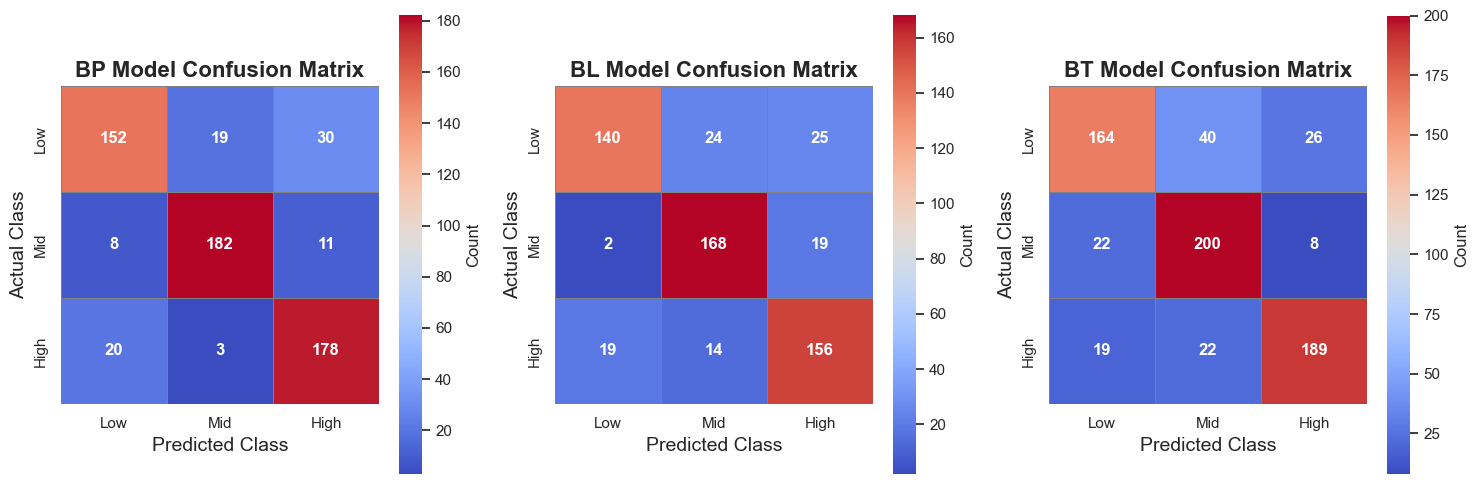

Elapsed Time: 0.94 seconds


In [14]:

start_time = time.time()
cm_BP = confusion_matrix(y_BP_resampled, y_BP_pred, labels=['Low', 'Mid', 'High'])
cm_BL = confusion_matrix(y_BL_resampled, y_BL_pred, labels=['Low', 'Mid', 'High'])
cm_BT = confusion_matrix(y_BT_resampled, y_BT_pred, labels=['Low', 'Mid', 'High'])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

heatmap_params = {
    'annot': True, 
    'fmt': 'd', 
    'linewidths': 0.5, 
    'linecolor': 'gray', 
    'square': True,
    'annot_kws': {"size": 12, "weight": "bold"},
    'cbar_kws': {'label': 'Count'}
}

# Model BP
sns.heatmap(cm_BP, cmap='coolwarm', ax=axes[0], xticklabels=['Low', 'Mid', 'High'], yticklabels=['Low', 'Mid', 'High'], **heatmap_params)
axes[0].set_title('BP Model Confusion Matrix', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Predicted Class', fontsize=14)
axes[0].set_ylabel('Actual Class', fontsize=14)

# Model BL
sns.heatmap(cm_BL, cmap='coolwarm', ax=axes[1], xticklabels=['Low', 'Mid', 'High'], yticklabels=['Low', 'Mid', 'High'], **heatmap_params)
axes[1].set_title('BL Model Confusion Matrix', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Predicted Class', fontsize=14)
axes[1].set_ylabel('Actual Class', fontsize=14)

# Model BT
sns.heatmap(cm_BT, cmap='coolwarm', ax=axes[2], xticklabels=['Low', 'Mid', 'High'], yticklabels=['Low', 'Mid', 'High'], **heatmap_params)
axes[2].set_title('BT Model Confusion Matrix', fontsize=16, fontweight='bold')
axes[2].set_xlabel('Predicted Class', fontsize=14)
axes[2].set_ylabel('Actual Class', fontsize=14)

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300)
plt.show()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")


### Voting Mechanism;

The decision-making process in Random Forest models for classification relies on an ensemble of decision trees. Each tree $ h(x_i, j) $ in the ensemble $ j = 1, 2, \dots, M $ makes a prediction for an observation $ x_i $, derived from a training subset $ D_n^{(j)} $ created through bootstrap sampling:

$$
D_n^{(j)} \sim \text{Bootstrap}(D_n)
$$

Once trained, Random Forest predicts the class label for a new observation $ x_i $ using majority voting across all trees. The model aggregates predictions from each tree to determine the final classification $ \hat{y}(x_i) $:

$$
\hat{y}(x_i) = \arg\max_{c \in C} \left\{ \sum_{j=1}^M 1\left[ h(x_i; \theta_j, D_n^{(j)}) = c \right] \right\}
$$

where $ C $ is the set of possible classes ($Low, Mid, High$), and the indicator function $ 1[\cdot] $ counts votes for each class. The majority vote approach is robust because it integrates diverse decision paths across trees, increasing stability and generalizability. For each decision tree, a prediction $ m_{(M, n)}(x_i) $ is made as follows:

$$
m_{(M,n)}(x_i) = \begin{cases} 
      \text{Low,} & \text{if } \frac{1}{M} \sum_{j=1}^M m_n(x_i; \theta_j, D_n^{(j)}) \text{ has most votes for Low} \\
      \text{Mid,} & \text{if } \frac{1}{M} \sum_{j=1}^M m_n(x_i; \theta_j, D_n^{(j)}) \text{ has most votes for Mid} \\
      \text{High,} & \text{if } \frac{1}{M} \sum_{j=1}^M m_n(x_i; \theta_j, D_n^{(j)}) \text{ has most votes for High}
   \end{cases}
$$

For each of the BP, BL, and BT models, the Random Forest ensemble votes on the class with the majority. This approach allows the Random Forest model to leverage the collective wisdom of all trees, yielding a robust classification outcome by aggregating the votes from diverse decision paths. This mechanism enhances the model’s reliability and minimizes the impact of individual tree biases. Each decision tree plot in this code visually captures how the model interprets the 22 independent variables, such as **Age**, **Income**, and **Social Media Usage**, to classify observations into Low, Mid, or High classes. By saving these visualizations as high-resolution images, the output provides a valuable tool for analyzing the model's approach to evaluating brand perception levels across the BP, BL, and BT dimensions.


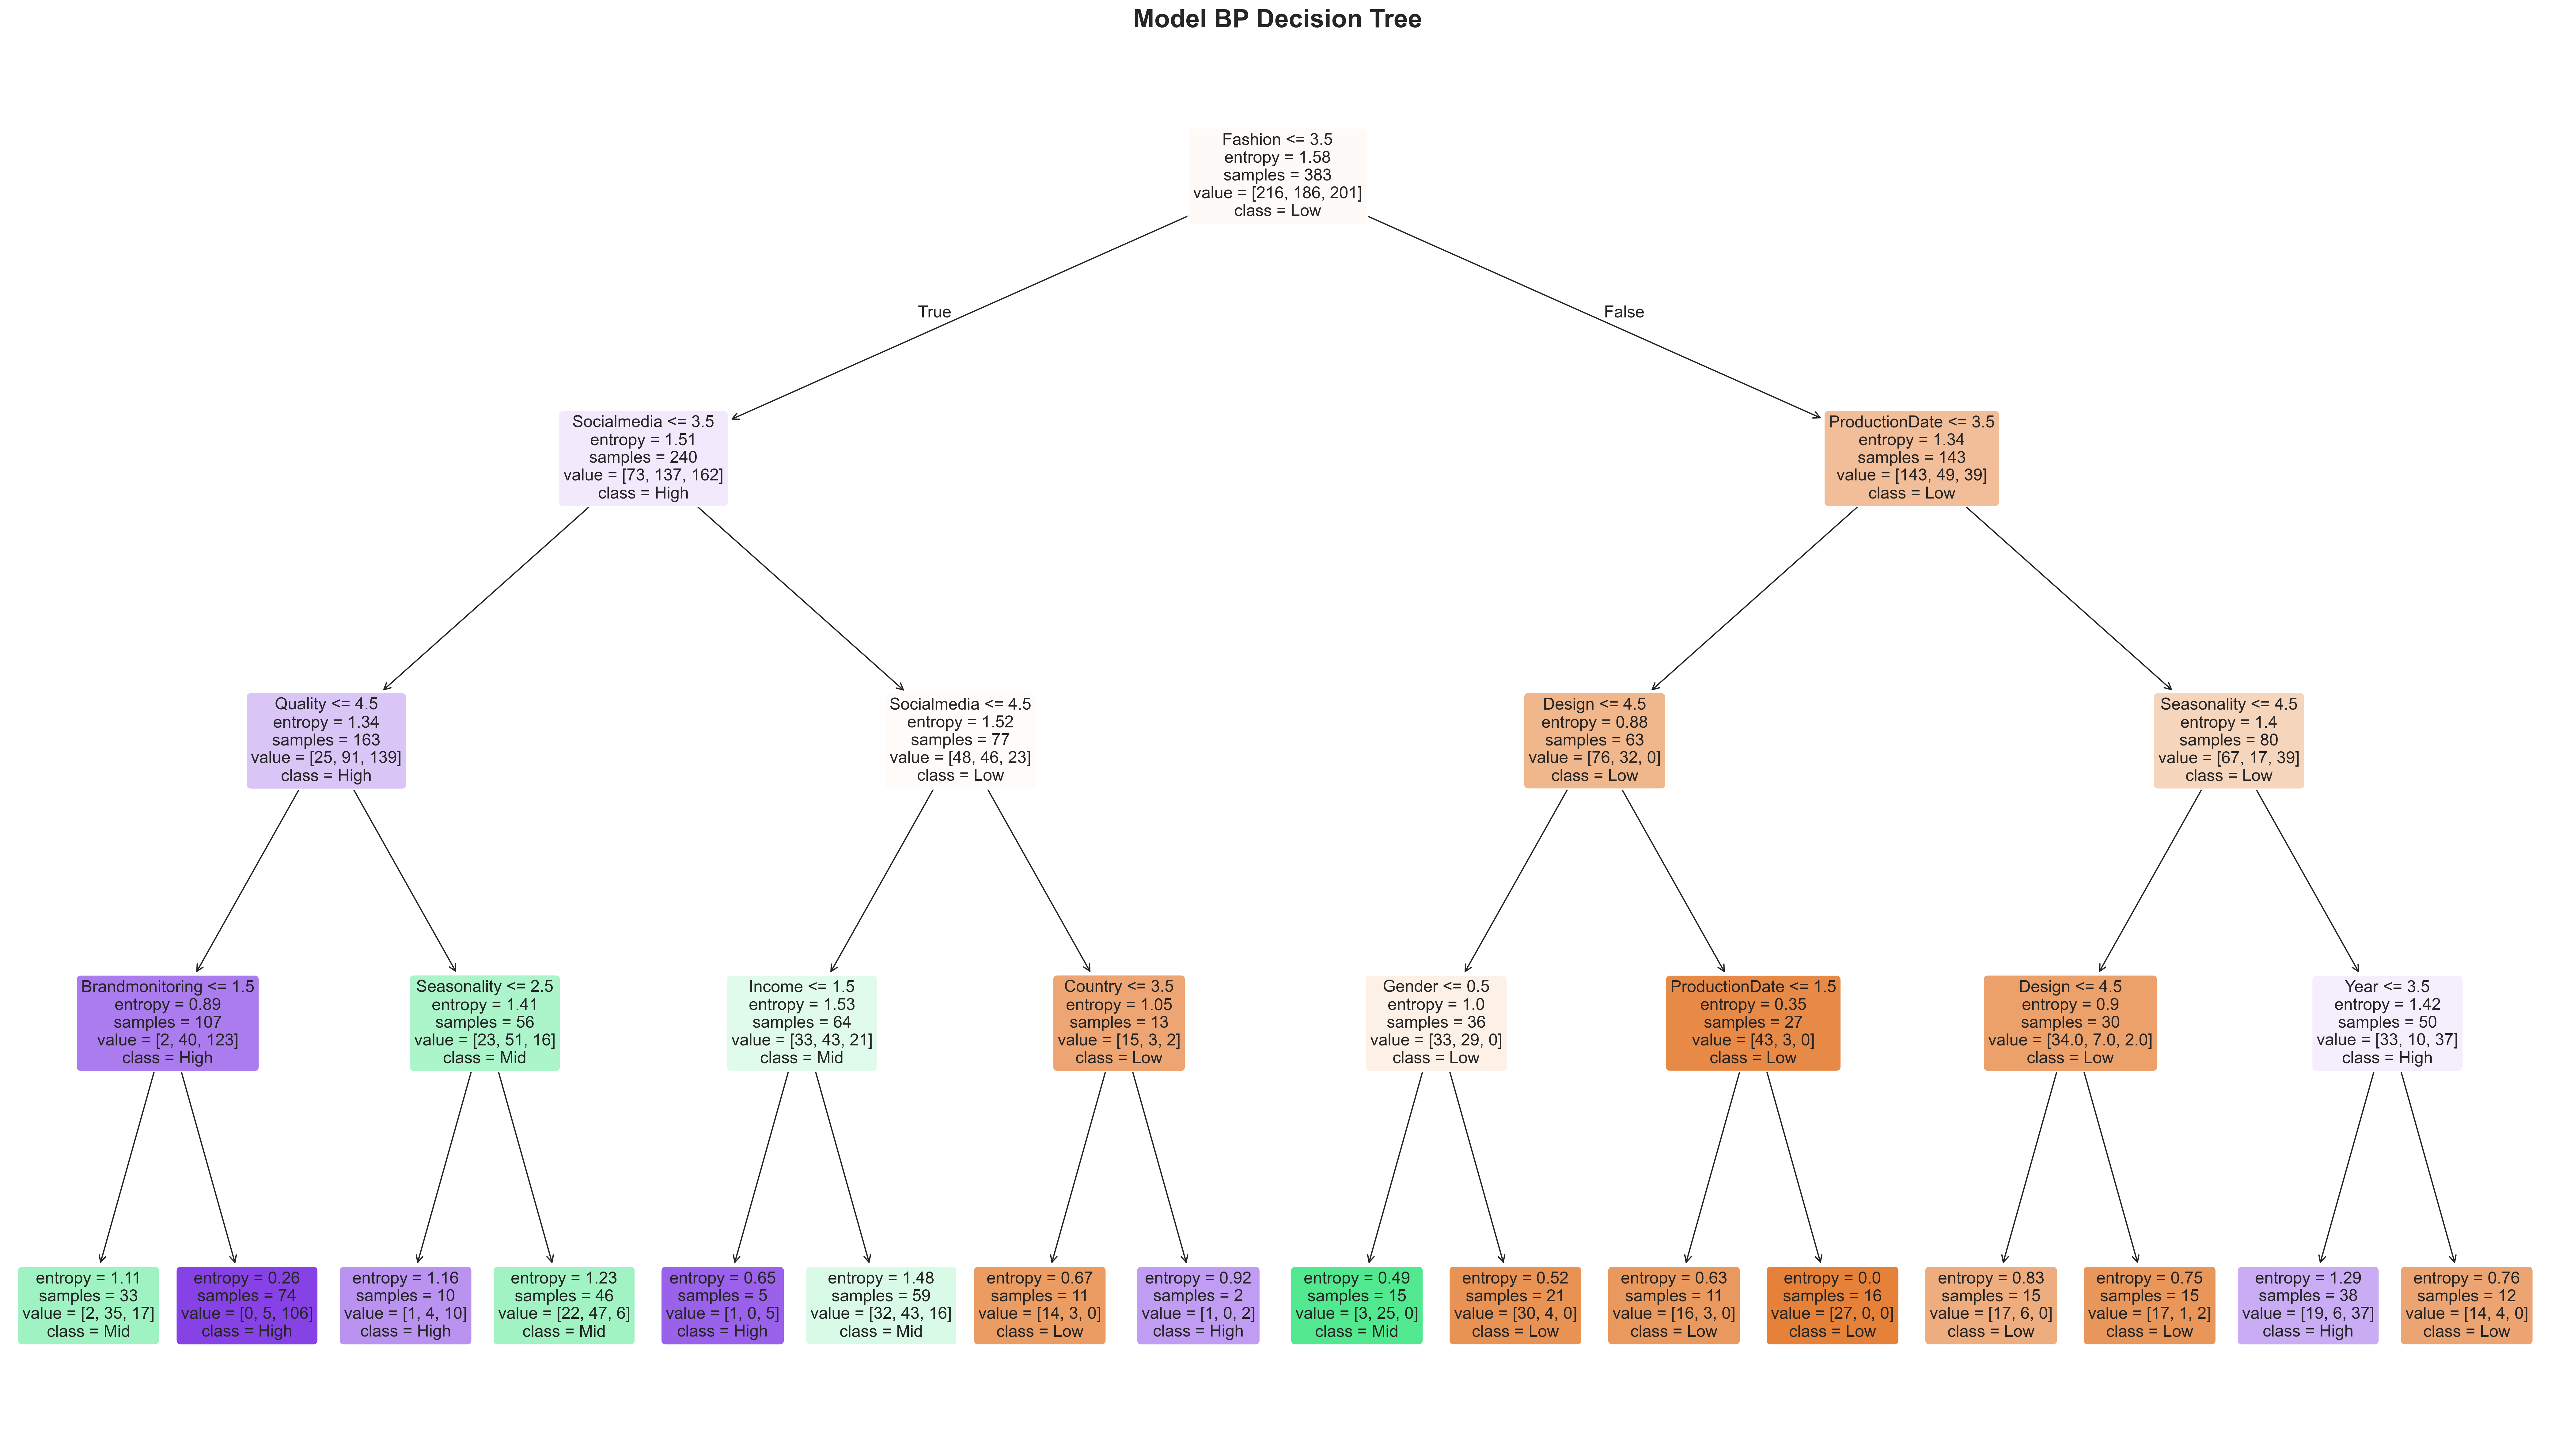

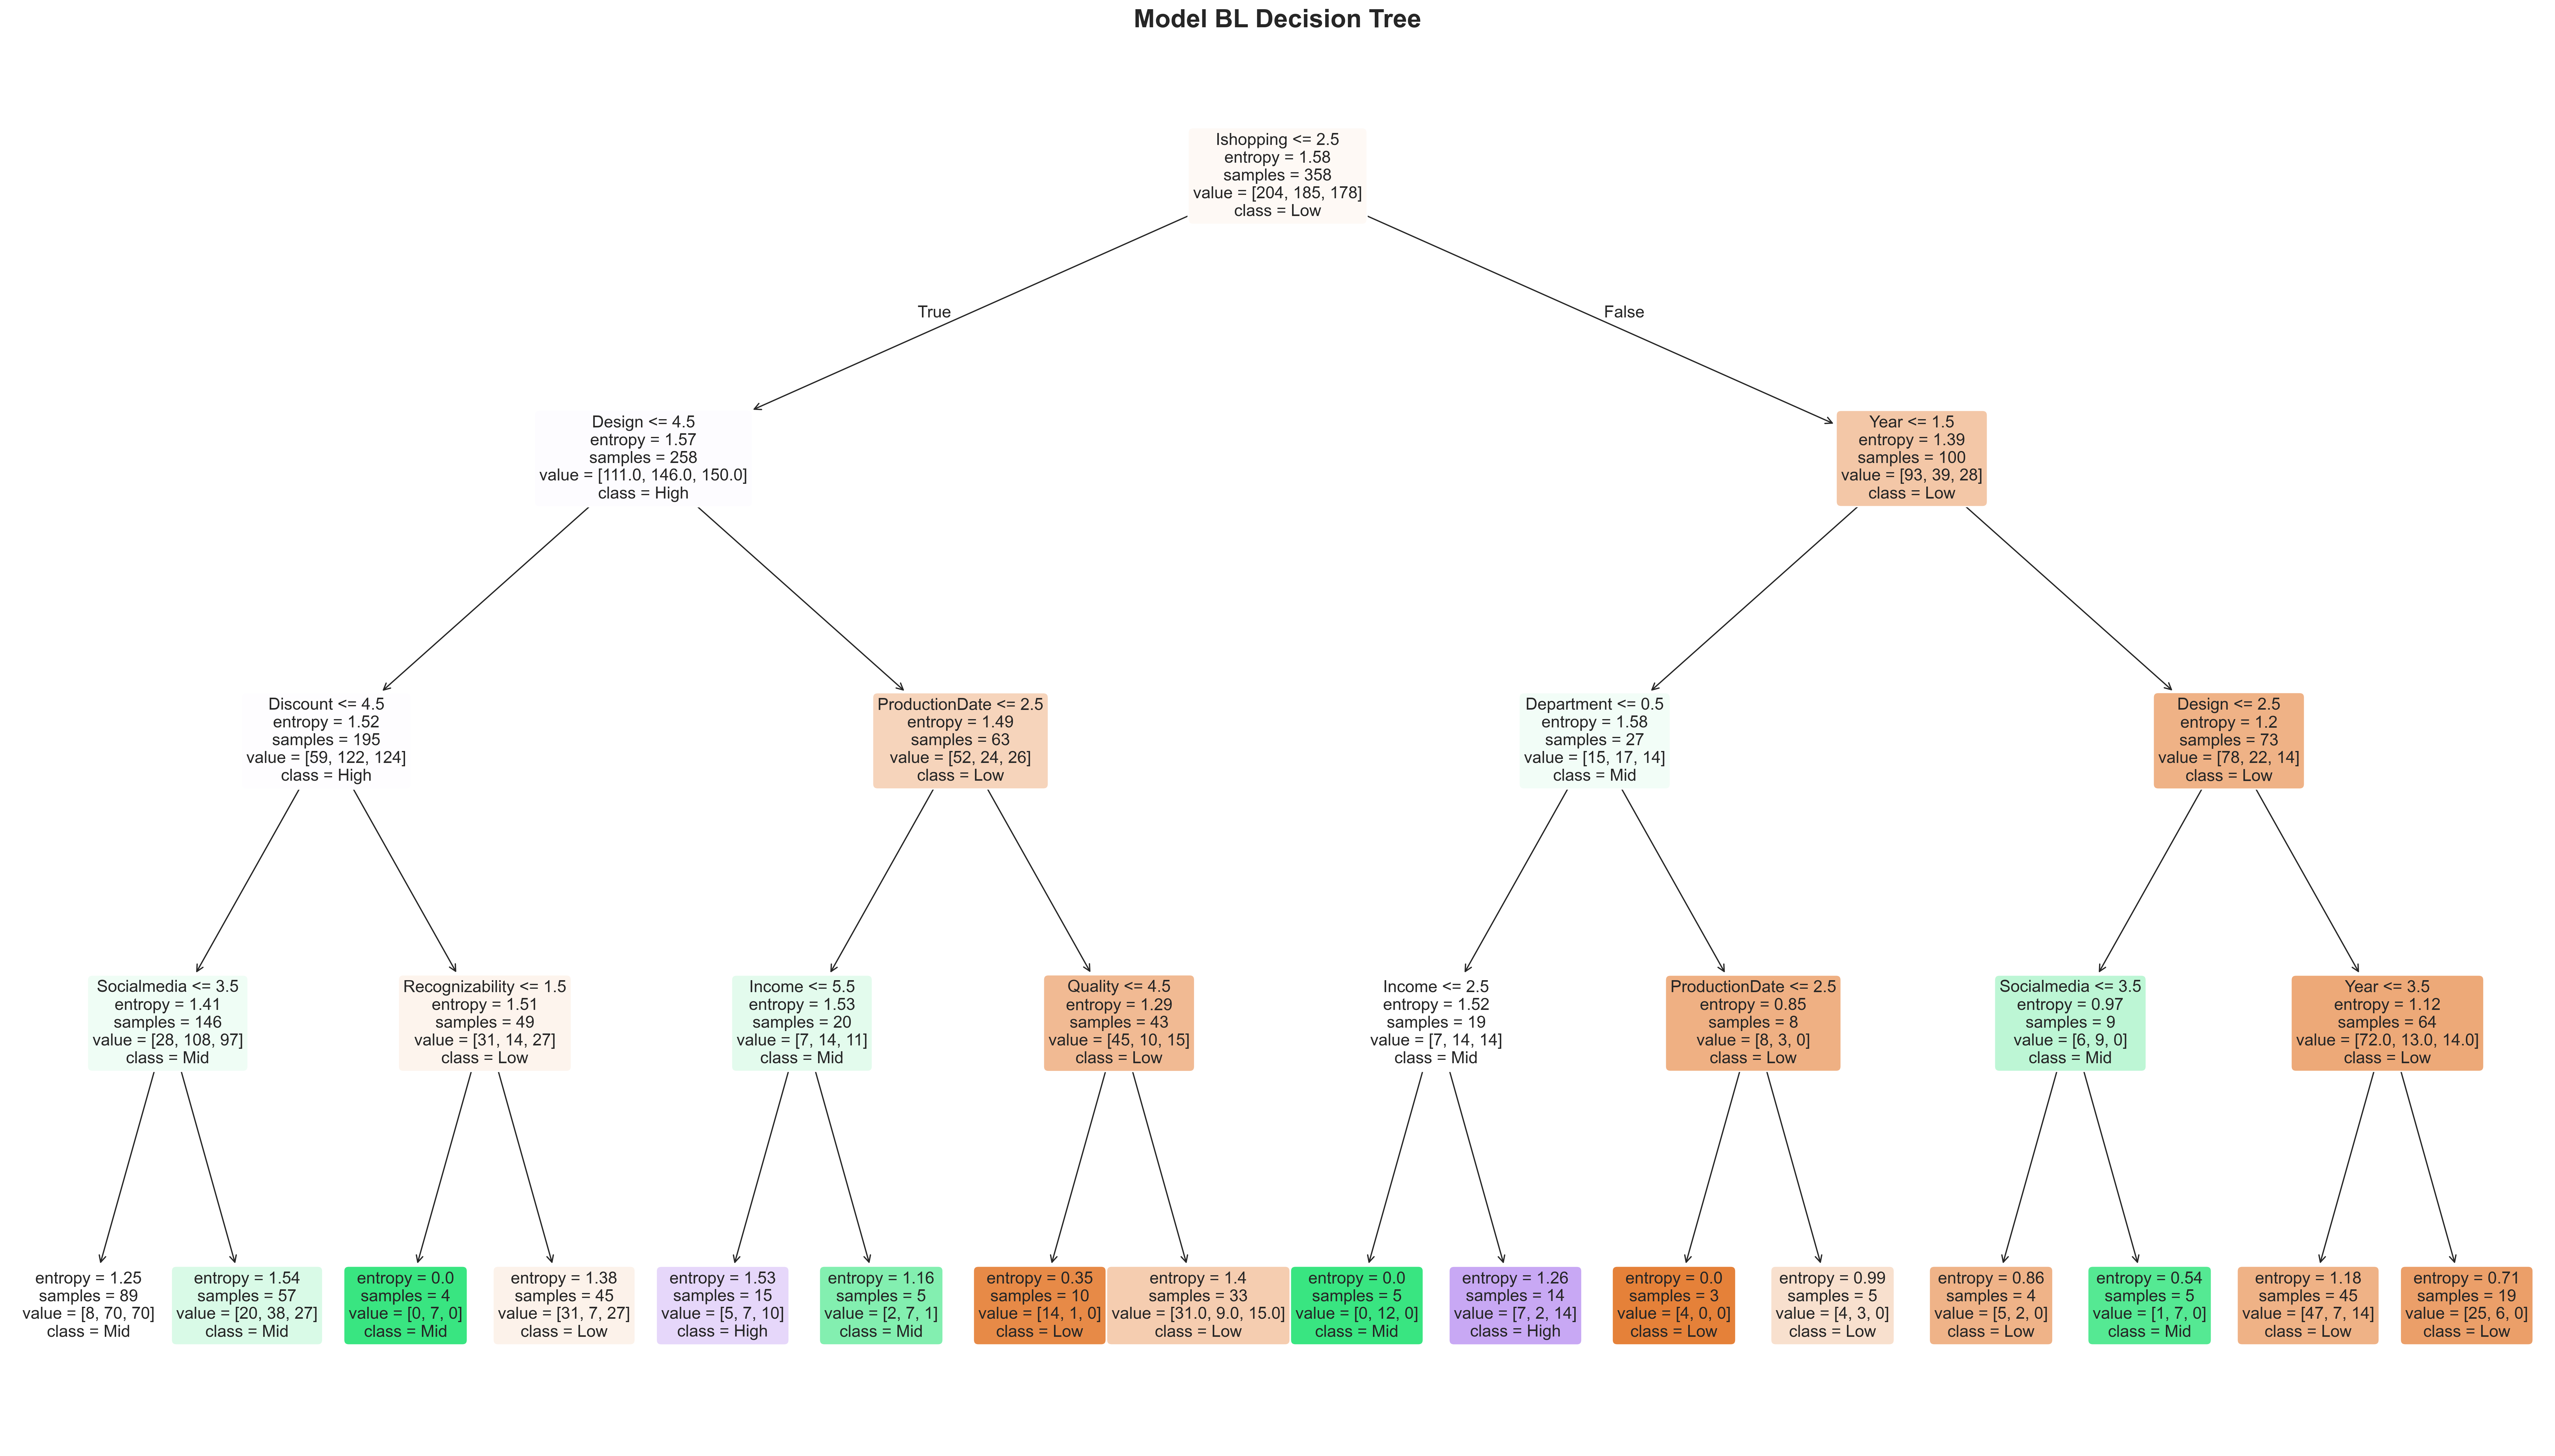

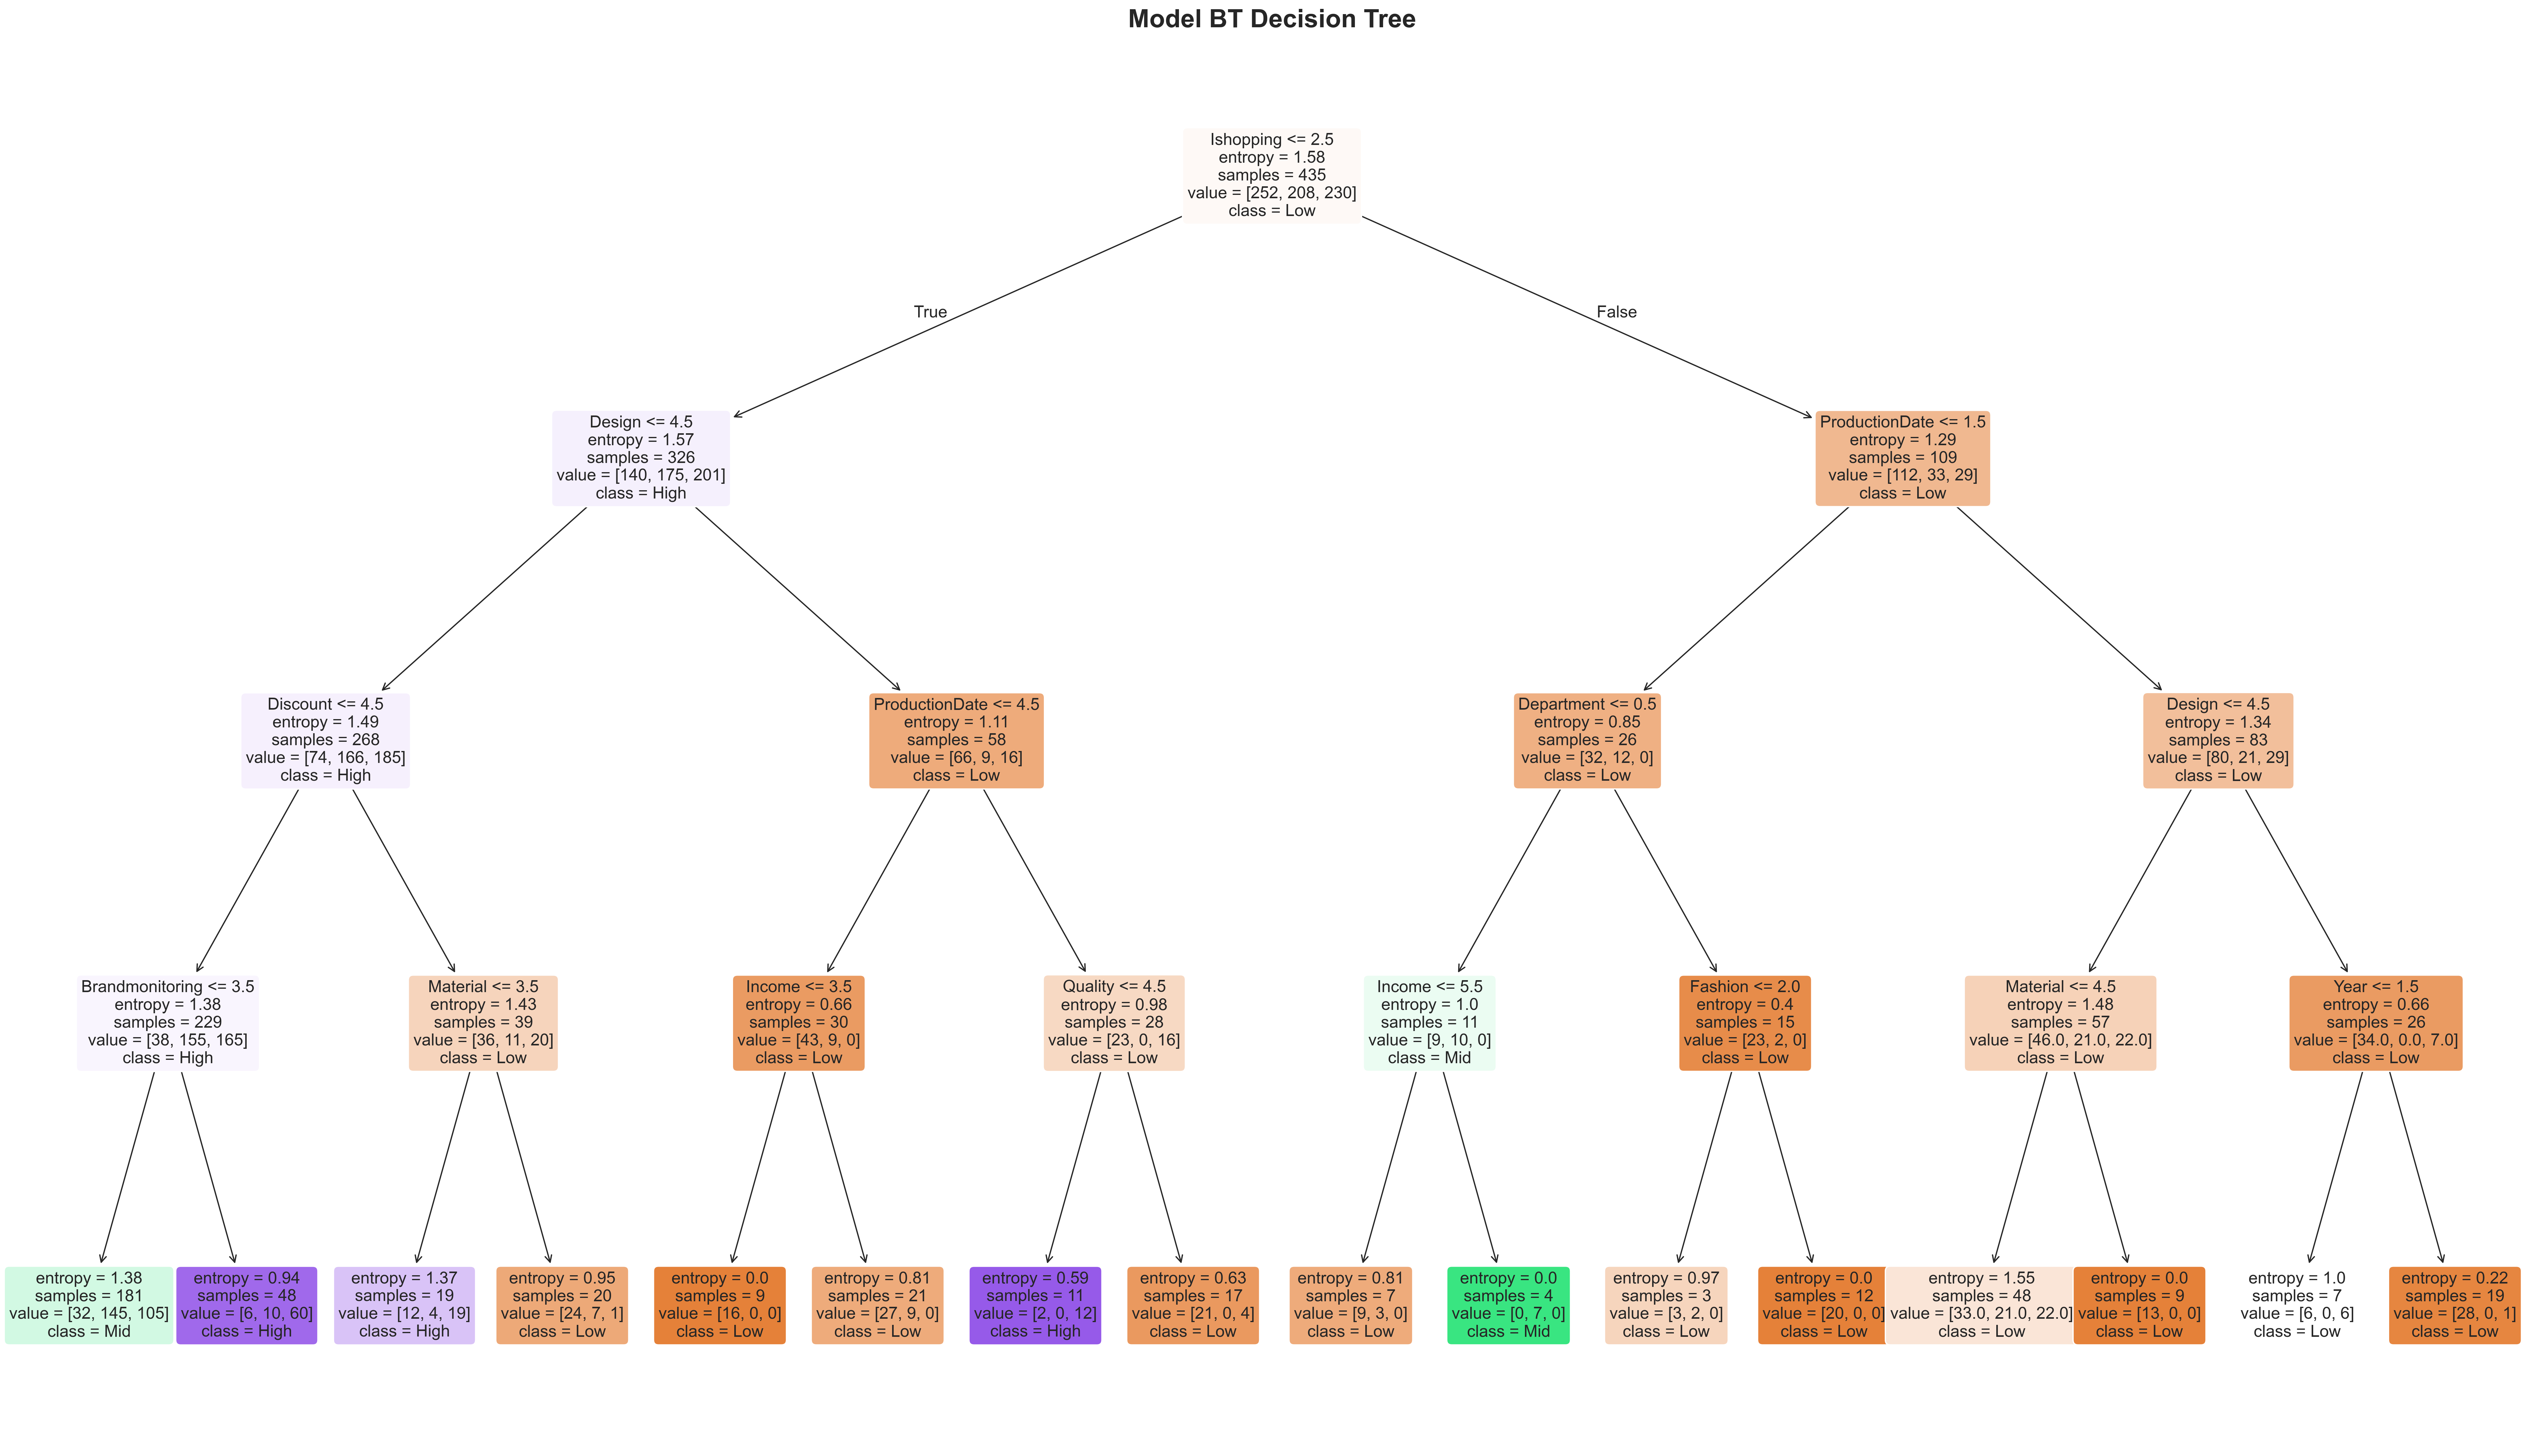

Elapsed Time: 12.62 seconds


In [15]:

start_time = time.time()
feature_names = [
    "Age", "Gender", "Department", "Year", "BandR",
    "Place", "Income", "Socialmedia", "Ishopping", "Brandmonitoring", 
    "Price", "Quality", "Timeofuse", "ProductionDate", "Seasonality", 
    "Material", "Discount", "Fashion", "Design", "Psychologicalimpulses",
    "Country", "Recognizability"
]

def plot_custom_tree(classifier, title, filename):
    plt.figure(figsize=(28, 16), dpi=300)
    plot_tree(classifier, 
              filled=True, 
              feature_names=feature_names,  
              class_names=['Low', 'Mid', 'High'], 
              fontsize=13,
              node_ids=False,
              proportion=False,
              rounded=True,
              precision=2)
    plt.title(title, fontsize=20, fontweight='bold')
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight')
    plt.show()
    
plot_custom_tree(classifier_BP.estimators_[0], "Model BP Decision Tree", "model_BP_decision_tree.png")
plot_custom_tree(classifier_BL.estimators_[0], "Model BL Decision Tree", "model_BL_decision_tree.png")
plot_custom_tree(classifier_BT.estimators_[0], "Model BT Decision Tree", "model_BT_decision_tree.png")
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")


This code performs a multilabel analysis of the each model using ROC (Receiver Operating Characteristic) curves and AUC (Area Under Curve) scores. ROC curves are highly effective for evaluating binary classifications, as they illustrate a model's ability to differentiate between positive and negative instances by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR). Although the project is a multiclass problem ($Low, Mid, High$), we apply a "one-vs-rest" approach, which binarizes the classes. This approach allows us to assess each class's performance individually, yielding insights into model accuracy for each perception level.

### Binarization and Multilabel ROC Analysis;
Each target variable $( y_{\text{BP}} $, $ y_{\text{BL}} $, $ y_{\text{BT}} $) is binarized to represent each class ($Low, Mid, High$) as a separate binary classification, facilitating ROC curve calculation. For each model, the `predict_proba` function calculates the predicted probability scores across classes, and separate ROC curves are generated for each class. The AUC value for each curve quantifies the model's classification effectiveness, with scores closer to 1.0 indicating high separability between classes. 

### Visualization of ROC Curves and Interpretation;
Three subplots display the ROC curves for BP, BL, and BT models, allowing side-by-side analysis. The color-coded lines correspond to each class ($Low, Mid, High$), and the diagonal line (FPR=TPR) represents a random guess baseline, against which model performance is compared. The high AUC scores observed for each class suggest that the models possess a strong capability to distinguish between levels of brand perception. This multilabel ROC approach provides detailed insights into model performance, which is crucial in fields like healthcare where distinguishing between nuanced classes (e.g., varying levels of disease severity) is essential. The visualized ROC curves and AUC metrics are essential for validating model performance in multiclass scenarios, offering a nuanced perspective on how well each model classifies observations into Low, Mid, or High categories.


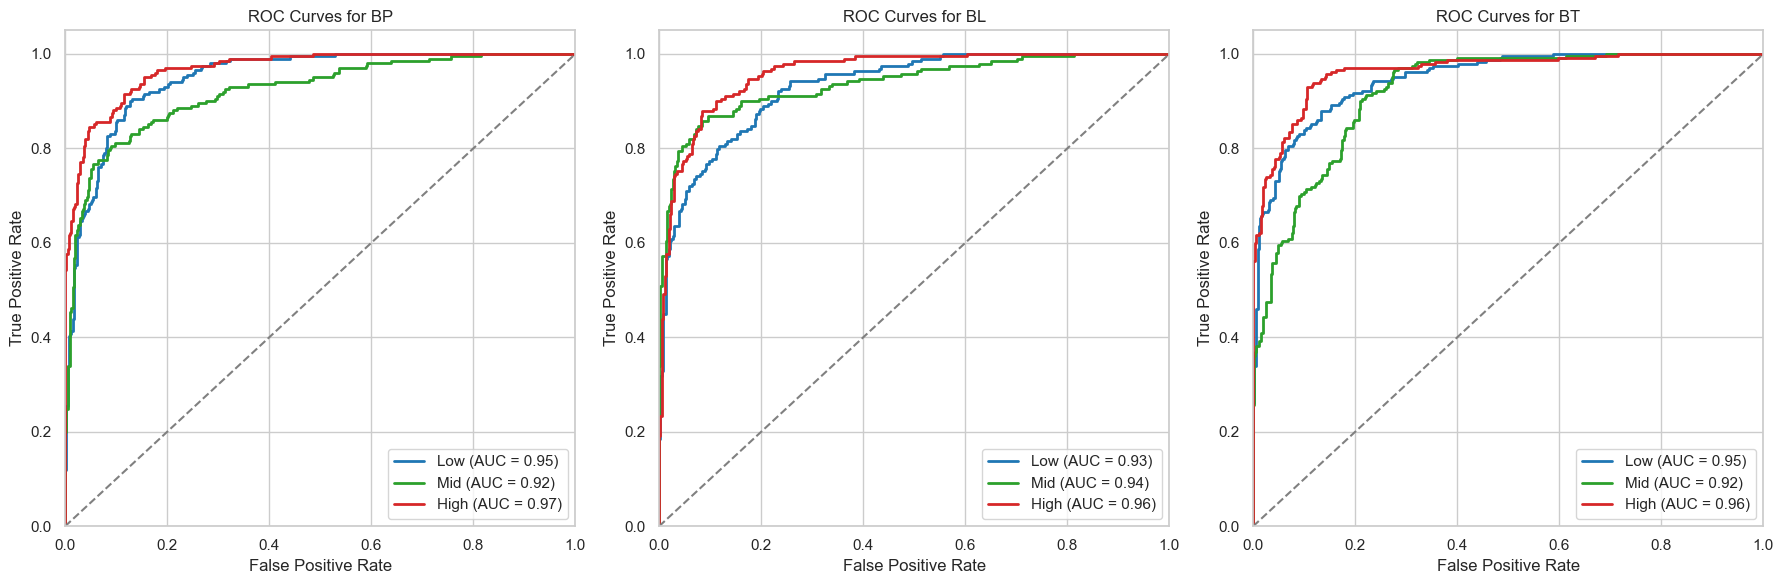

Elapsed Time: 1.05 seconds


In [16]:

start_time = time.time()
# Binarization of classes (Multilabel approach);
y_BP_bin = label_binarize(y_BP_resampled, classes=['High', 'Low', 'Mid'])  
y_BL_bin = label_binarize(y_BL_resampled, classes=['High', 'Low', 'Mid'])  
y_BT_bin = label_binarize(y_BT_resampled, classes=['High', 'Low', 'Mid'])  

# Create empty dict for ROC curves and AUC calculations;
fpr, tpr, roc_auc = {}, {}, {}
models = {'BP': classifier_BP, 'BL': classifier_BL, 'BT': classifier_BT}
X_resampled = {'BP': X_BP_resampled, 'BL': X_BL_resampled, 'BT': X_BT_resampled}
y_bins = {'BP': y_BP_bin, 'BL': y_BL_bin, 'BT': y_BT_bin}
colors = ['#1f77b4', '#2ca02c', '#d62728']

plt.figure(figsize=(18, 6))

# Class Names;
class_names = ['Low', 'Mid', 'High']

for idx, (model_name, model) in enumerate(models.items()):
    # Test set prediction scores;
    y_pred_scores = model.predict_proba(X_resampled[model_name])

    plt.subplot(1, 3, idx + 1)
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_bins[model_name][:, i], y_pred_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
        # Drawing the ROC Curves;
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')  # Dikey eksen
    plt.ylabel('True Positive Rate')  # Yatay eksen
    plt.title(f'ROC Curves for {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True)

plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300)
plt.show()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")


In [17]:

# How were the performances on the original dataset?
forest_BP = RandomForestClassifier(
    bootstrap=True,
    class_weight=None,
    max_depth=None,
    max_leaf_nodes=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=128,
    n_jobs=-1,
    criterion='entropy',
    random_state=0,
    verbose=0,
    warm_start=True
)
forest_BP.fit(X_BP_train, y_BP_train)

forest_BL = RandomForestClassifier(
    bootstrap=True,
    class_weight=None,
    max_depth=None,
    max_leaf_nodes=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=128,
    n_jobs=-1,
    criterion='entropy',
    random_state=0,
    verbose=0,
    warm_start=True
)
forest_BL.fit(X_BL_train, y_BL_train)

forest_BT = RandomForestClassifier(
    bootstrap=True,
    class_weight=None,
    max_depth=None,
    max_leaf_nodes=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=128,
    n_jobs=-1,
    criterion='entropy',
    random_state=0,
    verbose=0,
    warm_start=True
)
forest_BT.fit(X_BT_train, y_BT_train)

# Predictions on test sets;
y_pred_BP_test = forest_BP.predict(X_BP_test)
y_pred_BL_test = forest_BL.predict(X_BL_test)
y_pred_BT_test = forest_BT.predict(X_BT_test)

print("Classification Report for BP Model:")
print(classification_report(y_BP_test, y_pred_BP_test, zero_division=1))
print("Classification Report for BL Model:")
print(classification_report(y_BL_test, y_pred_BL_test, zero_division=1))
print("Classification Report for BT Model:")
print(classification_report(y_BT_test, y_pred_BT_test, zero_division=1))


Classification Report for BP Model:
              precision    recall  f1-score   support

        High       0.77      0.94      0.85        71
         Low       0.73      0.42      0.54        26
         Mid       1.00      0.00      0.00         5

    accuracy                           0.76       102
   macro avg       0.83      0.46      0.46       102
weighted avg       0.77      0.76      0.73       102

Classification Report for BL Model:
              precision    recall  f1-score   support

        High       0.73      0.95      0.83        63
         Low       0.80      0.48      0.60        33
         Mid       1.00      0.00      0.00         6

    accuracy                           0.75       102
   macro avg       0.84      0.48      0.48       102
weighted avg       0.77      0.75      0.71       102

Classification Report for BT Model:
              precision    recall  f1-score   support

        High       0.78      1.00      0.88        76
         Low       1.